### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib

from data_applications.profiling import *
from data_applications.static_baseline import *

### Importing Data

In [2]:
campus1_file = "campus1_builing_device_count.csv"
occ_df = pd.read_csv(campus1_file, index_col=[0], parse_dates=True)
occ_df.head()

,Building Device Count
Timestamp,
2019-10-01 00:00:00,42
2019-10-01 00:05:00,45
2019-10-01 00:10:00,45
2019-10-01 00:15:00,45
2019-10-01 00:20:00,43


## Hourly Wi-Fi based occupancy profiling

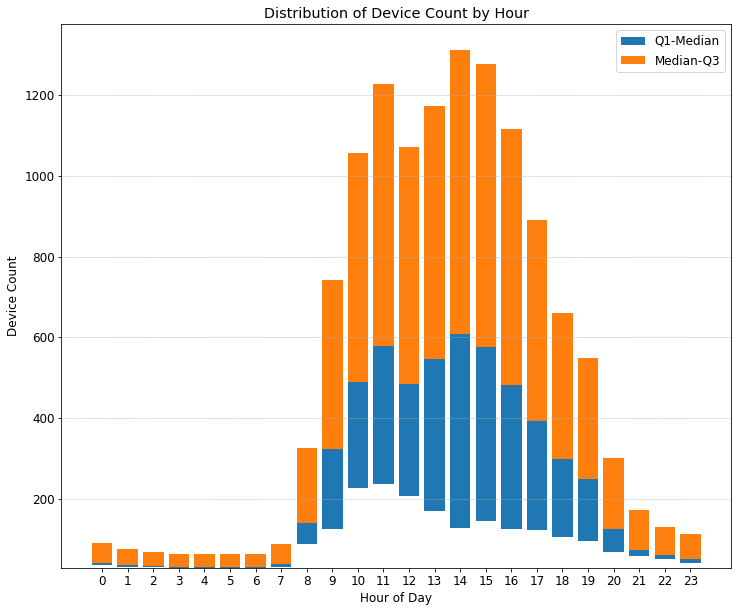

Building Device Count                                          \
                          count       mean        std   min   25%   50%   
Timestamp                                                                 
0                         372.0  47.301075  25.726651  24.0  37.0  42.0   
1                         372.0  41.005376  25.287244  24.0  32.0  35.5   
2                         372.0  37.142473  24.500148  19.0  30.0  33.0   
3                         372.0  35.163978  23.384112  18.0  29.0  31.0   
4                         372.0  34.809140  22.244746  20.0  29.0  31.0   

                         
             75%    max  
Timestamp                
0          49.00  184.0  
1          40.25  177.0  
2          35.00  171.0  
3          33.00  164.0  
4          33.00  158.0

In [3]:
occ_desc = hourly_profile(occ_df)
occ_desc.head()

## Static Device Baseline Removal

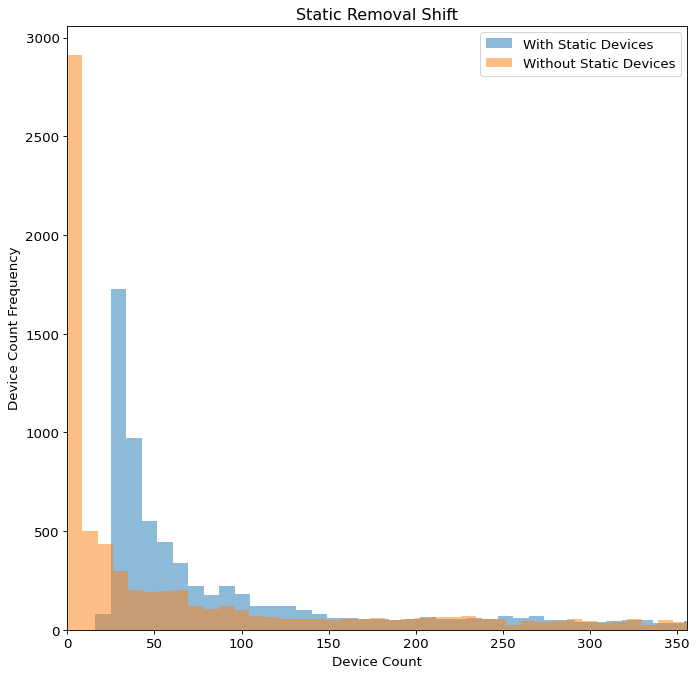

In [4]:
occ_static_removed = remove_static(occ_df, unocc_st = '01:00:00', unocc_et = '04:00:00', quartile='75%')

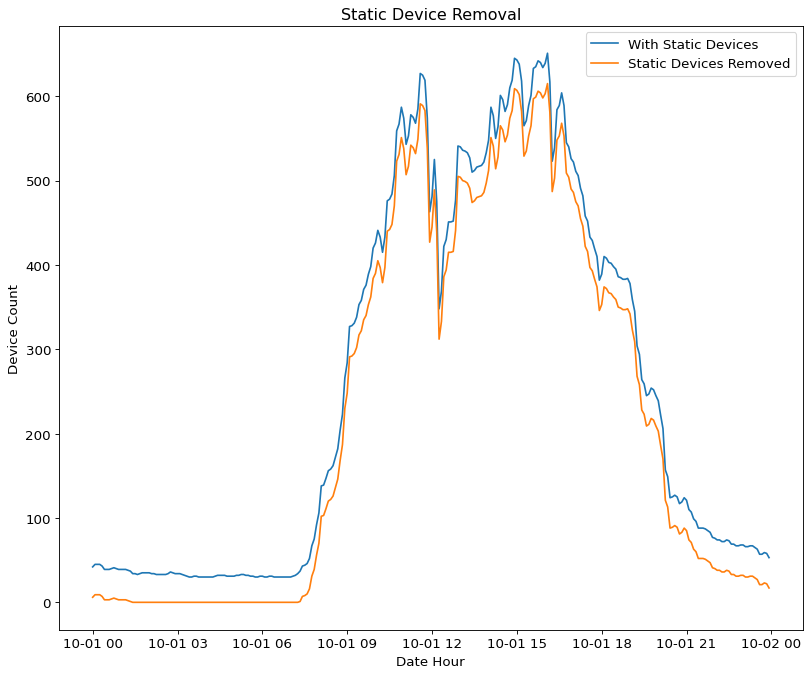

In [5]:
# Visualizing single date from data 

font = {'size'   : 12}
plt.rc('font', **font)

plt.figure(figsize=(12, 10), dpi=80)
plt.plot(occ_df['2019-10-01'], label = "With Static Devices")
plt.plot(occ_static_removed['2019-10-01'], label = "Static Devices Removed")
plt.gca().set(title='Static Device Removal', xlabel='Date Hour', ylabel='Device Count')
plt.legend()
plt.show()